# Question 1 Answers

### Importing all the needed modules

In [1]:
#importing all the needed modules
import nltk
from nltk.corpus import gutenberg
from collections import Counter
import glob
import string
import matplotlib.pyplot as plt
import csv


### Reading each file in dir gutenberg and iterating through each file and saving data to data_all

In [6]:
data_all=[] #Storing Data in data_lower

#iterating through each file in gutenberg
for filename in glob.iglob('/Users/vishaldiyora/nltk_data/corpora/gutenberg/*.txt'): 
    with open(filename,'r' ,encoding='utf-8', errors='ignore') as data_file:
        data=data_file.read() #reading each file and its data 
        datain_lower=data.lower() #lower case the data
        data_split=datain_lower.split() #spliting the data into words
    data_all+=data_split

### Excluding punctuation and Counting frequency using counter

In [7]:

exclude = set(string.punctuation) #Removing Punctuation

total_data=[x for x in data_all if x not in exclude] 

data_counter=Counter(total_data) #Counting Frequency of the datas

### Sorting as per frequency and separting word and frequency to list

In [10]:
#defining the function for sorting
def sorting_frequency():
    return sorted(data_counter.items(), key=lambda pair: pair[1], reverse=True)
x=sorting_frequency() # Sorting as per the frequecny
word,frequency=zip(*x)   #separting word and frequency

### Assigning Rank as per the length and Writing word frequecny rank to csv file

In [11]:
ranks=[]
rank=1

#Giving rank to the words frequecny
for li in range(len(frequency)):
    ranks.append(rank)
    rank+=1;
    

#Writing word_rank_frequecny to csv file      
with open('word_rank_frequecny_data.csv', 'w') as csvfile:
    fieldnames = ['Word','Frequency','Rank']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for (a,z,r) in zip(word,frequency,ranks):
            writer.writerow({'Word':a,'Frequency': z,'Rank': r})

### Reading  Rank Freq CSV file and ploting loglog graph of  <span style="color:blue"> _Freq vs Rank_ </span> of words

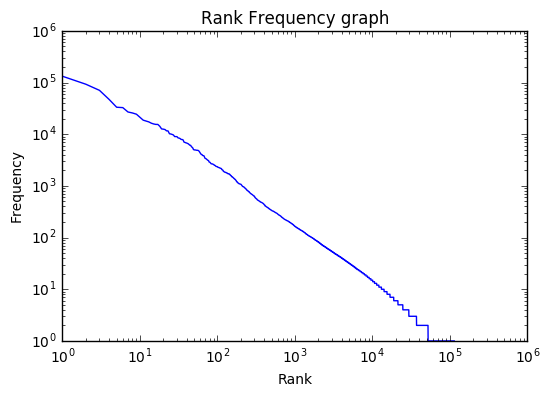

In [15]:
x_axis = []
y_axis = []
with open('word_rank_frequecny_data.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) #Skips first row of the csv file
    
    #iterating through rows of rank and frequency
    for ech_row in csvreader: 
        x_axis.append(int(ech_row[2]))
        y_axis.append(int(ech_row[1]))

plt.loglog(x_axis,y_axis)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Rank Frequency graph')
plt.show()

### From the graph we can see that Zipf's law  is 20% of other 80% words in gutenberg and it is showing a straight line and it is satisfy and proved.